# Project Understanding
## Objective
The objective of this project is to predict students' GPA and GradeClass based on various features such as age, gender, ethnicity, parental education, study time, absences, extracurricular activities, etc.

## Scope
Develop a model that can classify students into different grade classes and predict their GPA.

## Dataset Information
- Total Entries: 2392
- Features: StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass
---------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder



C:\Users\karim\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---------------------------------------------

Section 2: Data Mining and Processing


In [2]:
# Load dataset


df = pd.read_csv('E:\DS Diploma\jupyter notebooks\machine_learning\DataSets/Student_performance_data _.csv')

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
# Display info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
# Display descriptive statistics
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


---------------------------------------------

In [5]:
df.shape

(2392, 15)

---------------------------------------------

In [6]:

# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


---------------------------------------------

In [7]:
# Normalize/scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['StudentID', 'GPA', 'GradeClass'], axis=1))


---------------------------------------------

In [8]:
# Split data into training and testing sets for GPA prediction (regression)

X_train_gpa, X_test_gpa, y_train_gpa, y_test_gpa = train_test_split(X_scaled, df['GPA'], test_size=0.2, random_state=42)


---------------------------------------------

In [9]:
# Split data into training and testing sets for GradeClass prediction (classification)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, df['GradeClass'], test_size=0.2, random_state=42)


---------------------------------------------

Section 3: Data Exploration


---------------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

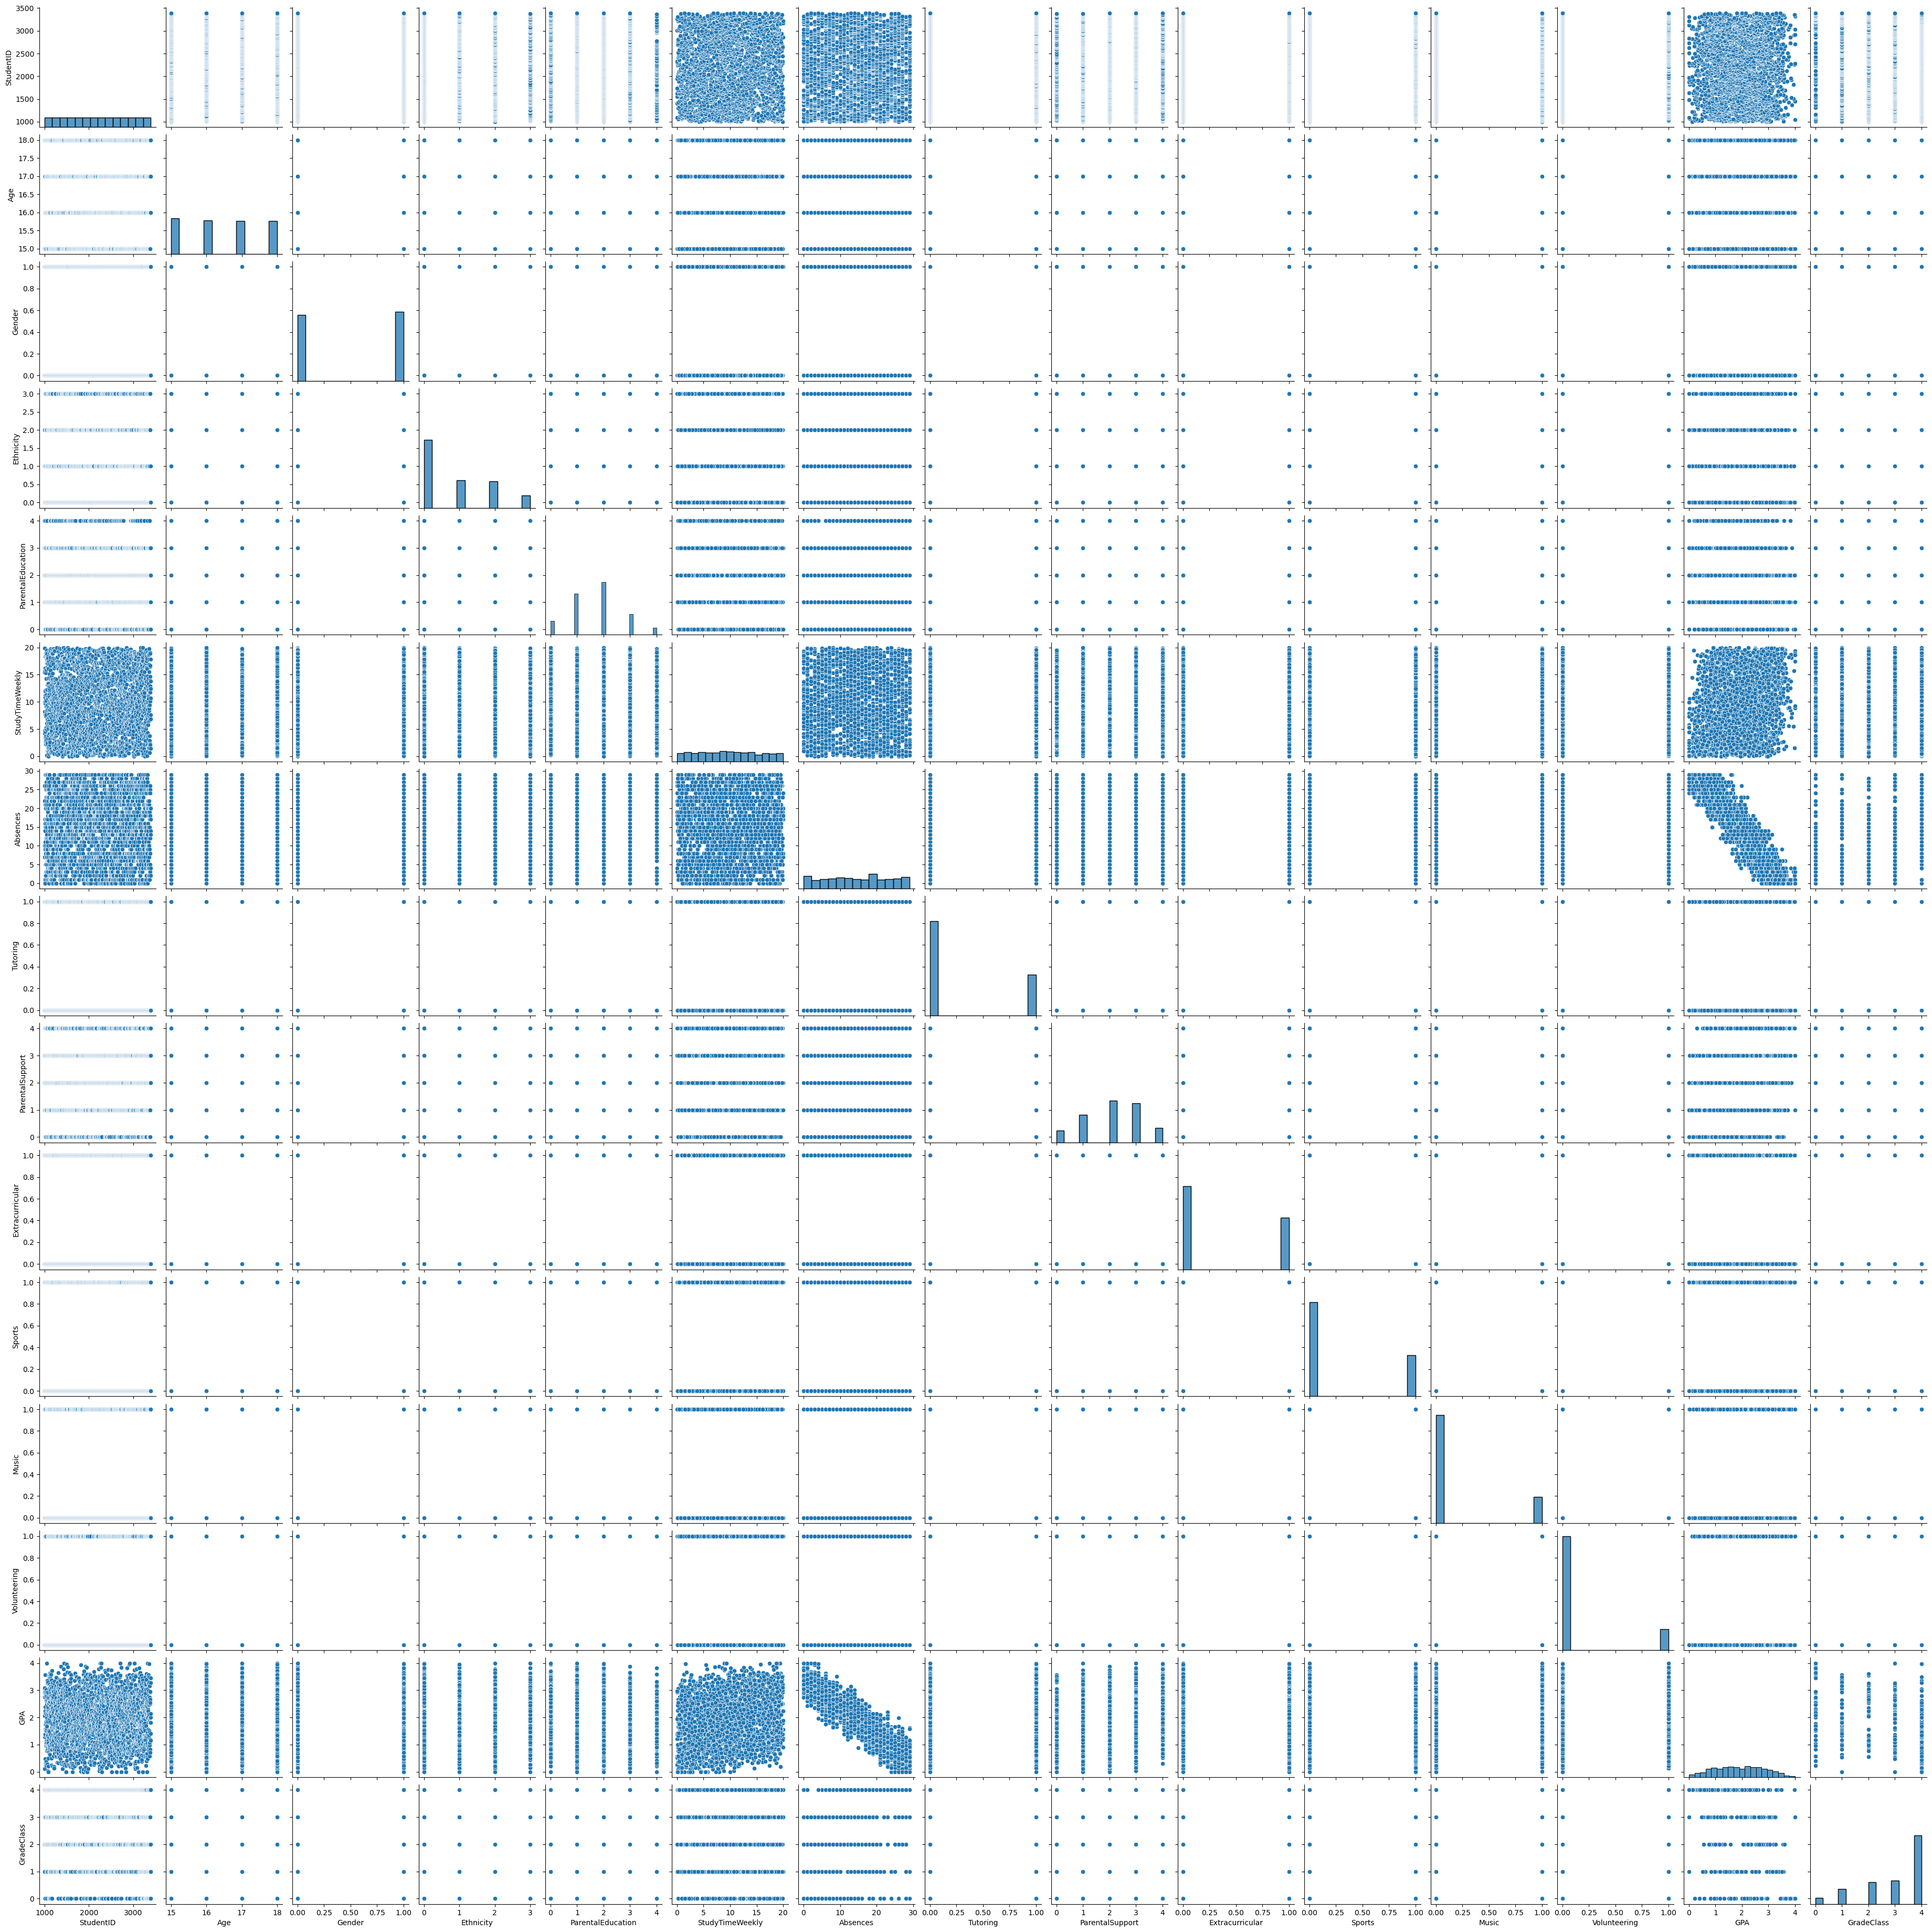

In [10]:
# Visualize the data

sns.pairplot(df)
plt.show()

--------------------------------------

1. Distribution of Numerical Features
Use histograms and boxplots to understand the distribution of numerical features such as Age, StudyTimeWeekly, Absences, GPA, and GradeClass.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

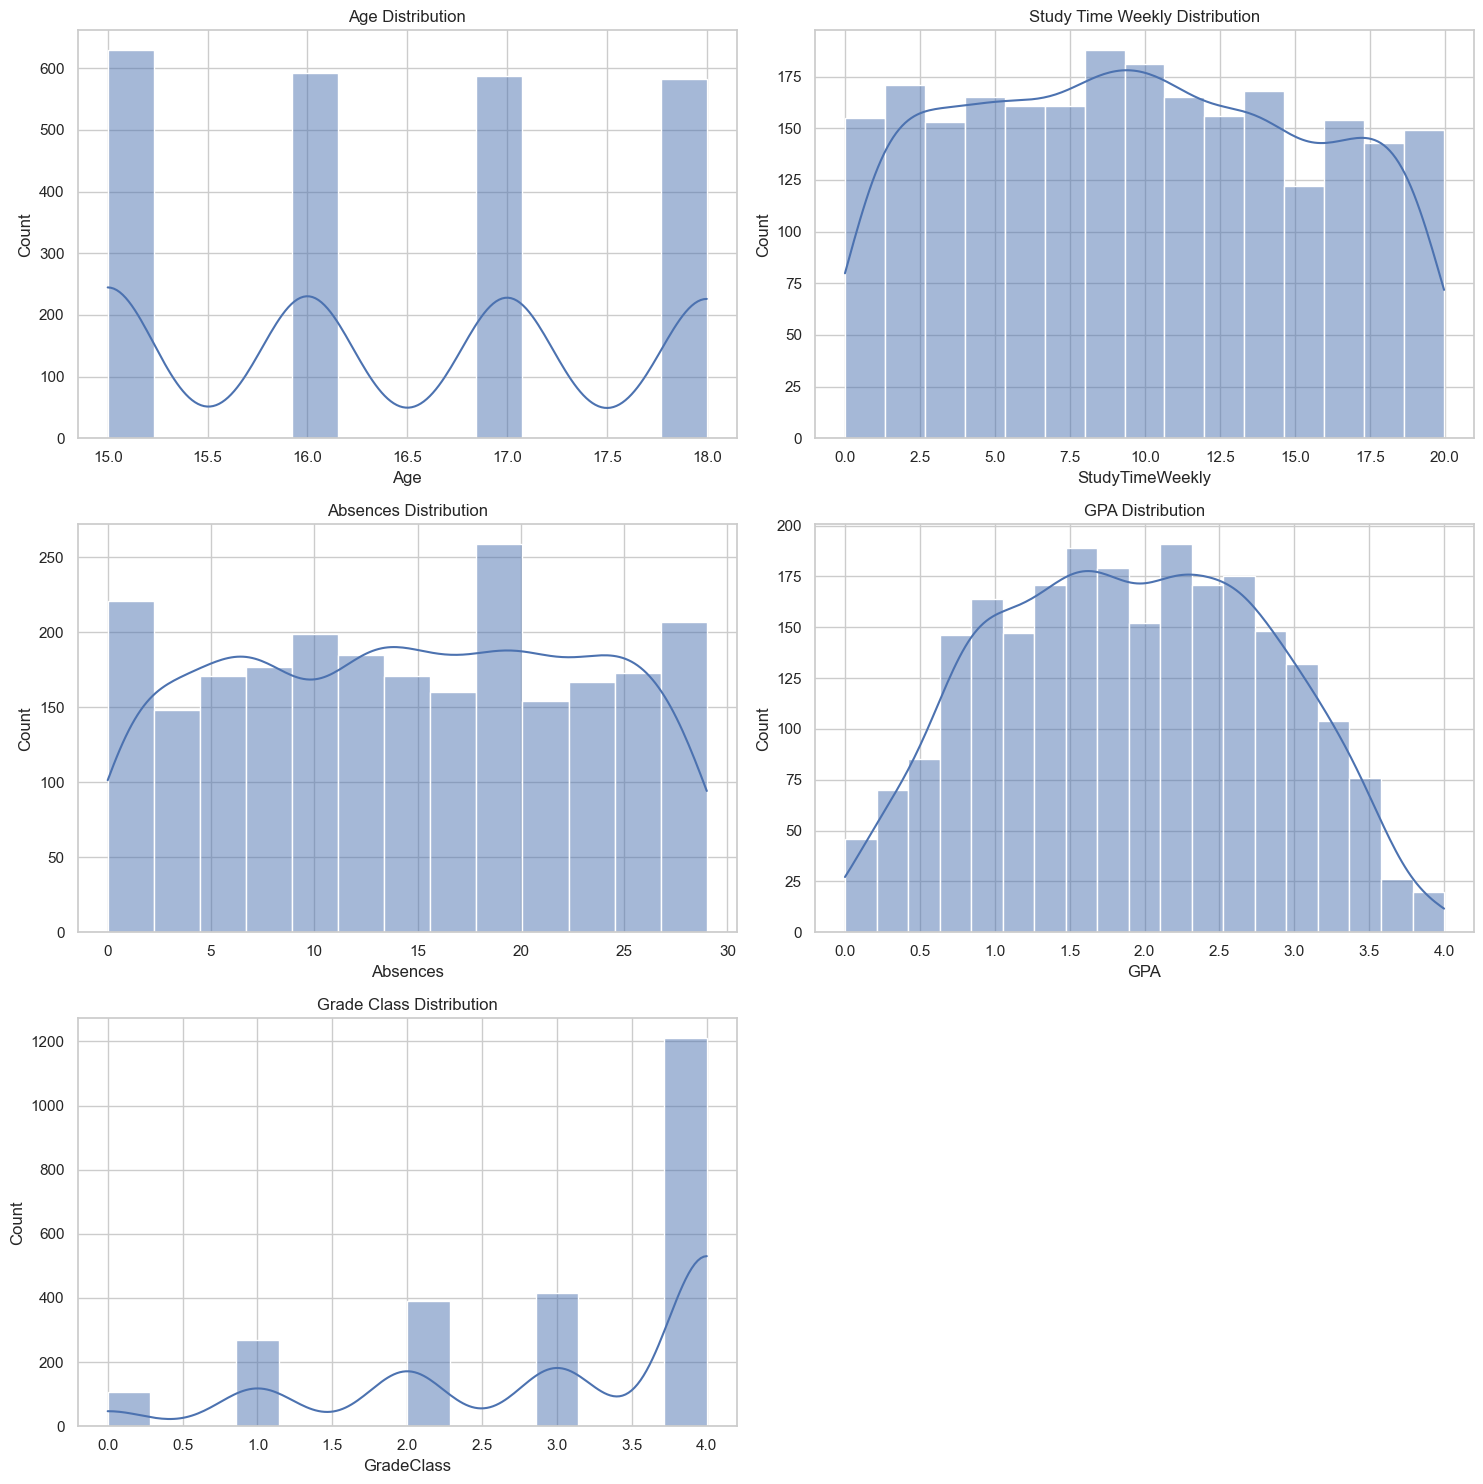

In [11]:

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Age distribution
sns.histplot(df['Age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# StudyTimeWeekly distribution
sns.histplot(df['StudyTimeWeekly'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Study Time Weekly Distribution')

# Absences distribution
sns.histplot(df['Absences'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Absences Distribution')

# GPA distribution
sns.histplot(df['GPA'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('GPA Distribution')

# GradeClass distribution
sns.histplot(df['GradeClass'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Grade Class Distribution')

# Hide the empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()


---------------------------------------

2. Boxplots of Numerical Features
Boxplots can be useful to identify outliers and understand the spread of the data.

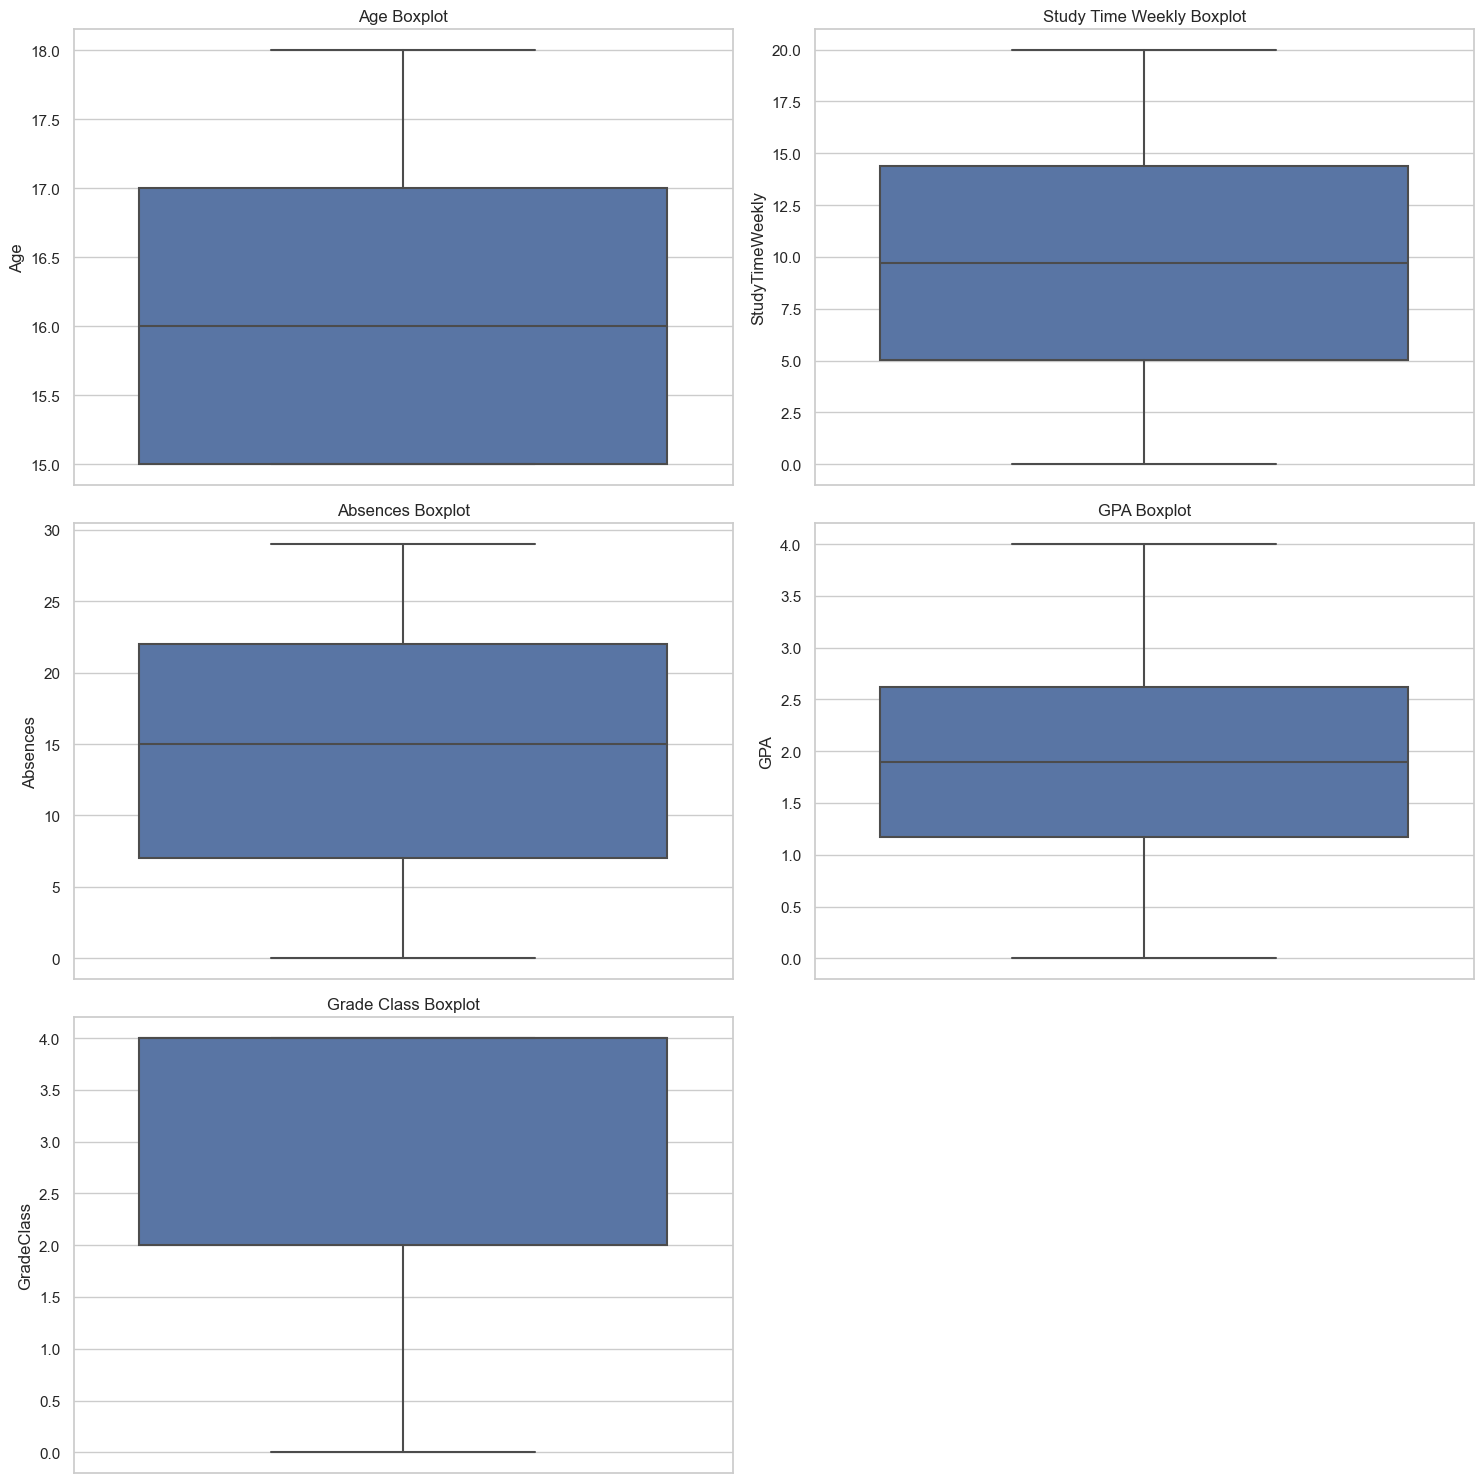

In [12]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Age boxplot
sns.boxplot(y=df['Age'], ax=axs[0, 0])
axs[0, 0].set_title('Age Boxplot')

# StudyTimeWeekly boxplot
sns.boxplot(y=df['StudyTimeWeekly'], ax=axs[0, 1])
axs[0, 1].set_title('Study Time Weekly Boxplot')

# Absences boxplot
sns.boxplot(y=df['Absences'], ax=axs[1, 0])
axs[1, 0].set_title('Absences Boxplot')

# GPA boxplot
sns.boxplot(y=df['GPA'], ax=axs[1, 1])
axs[1, 1].set_title('GPA Boxplot')

# GradeClass boxplot
sns.boxplot(y=df['GradeClass'], ax=axs[2, 0])
axs[2, 0].set_title('Grade Class Boxplot')

# Hide the empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()


--------------------------------

3. Count Plots of Categorical Features
Count plots help visualize the frequency of categorical features such as Gender, Ethnicity, ParentalEducation, etc.

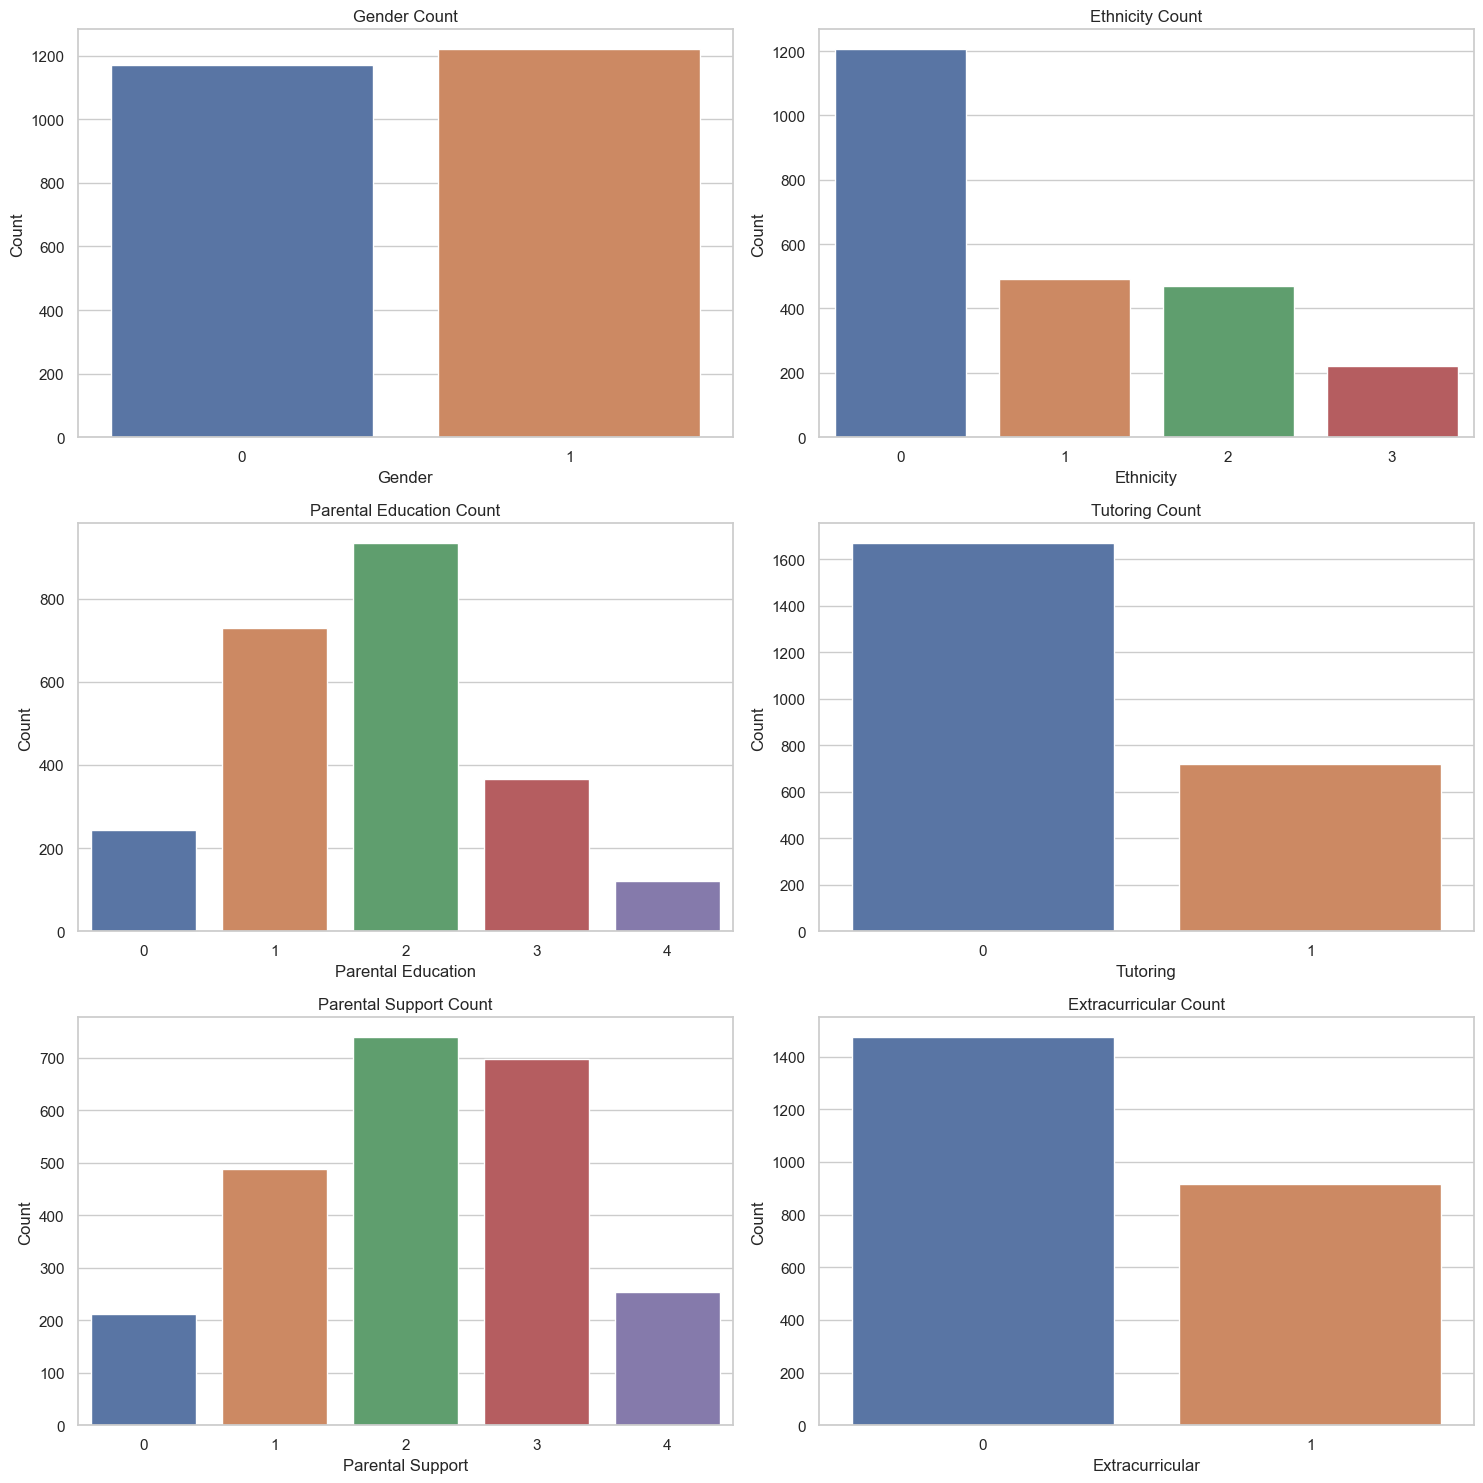

In [13]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Gender count plot
sns.countplot(x=df['Gender'], ax=axs[0, 0])
axs[0, 0].set_title('Gender Count')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')

# Ethnicity count plot
sns.countplot(x=df['Ethnicity'], ax=axs[0, 1])
axs[0, 1].set_title('Ethnicity Count')
axs[0, 1].set_xlabel('Ethnicity')
axs[0, 1].set_ylabel('Count')

# ParentalEducation count plot
sns.countplot(x=df['ParentalEducation'], ax=axs[1, 0])
axs[1, 0].set_title('Parental Education Count')
axs[1, 0].set_xlabel('Parental Education')
axs[1, 0].set_ylabel('Count')

# Tutoring count plot
sns.countplot(x=df['Tutoring'], ax=axs[1, 1])
axs[1, 1].set_title('Tutoring Count')
axs[1, 1].set_xlabel('Tutoring')
axs[1, 1].set_ylabel('Count')

# ParentalSupport count plot
sns.countplot(x=df['ParentalSupport'], ax=axs[2, 0])
axs[2, 0].set_title('Parental Support Count')
axs[2, 0].set_xlabel('Parental Support')
axs[2, 0].set_ylabel('Count')

# Extracurricular count plot
sns.countplot(x=df['Extracurricular'], ax=axs[2, 1])
axs[2, 1].set_title('Extracurricular Count')
axs[2, 1].set_xlabel('Extracurricular')
axs[2, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


--------------------------

4. Correlation Matrix Heatmap
A correlation matrix heatmap shows the relationships between numerical features, which helps in identifying highly correlated features.

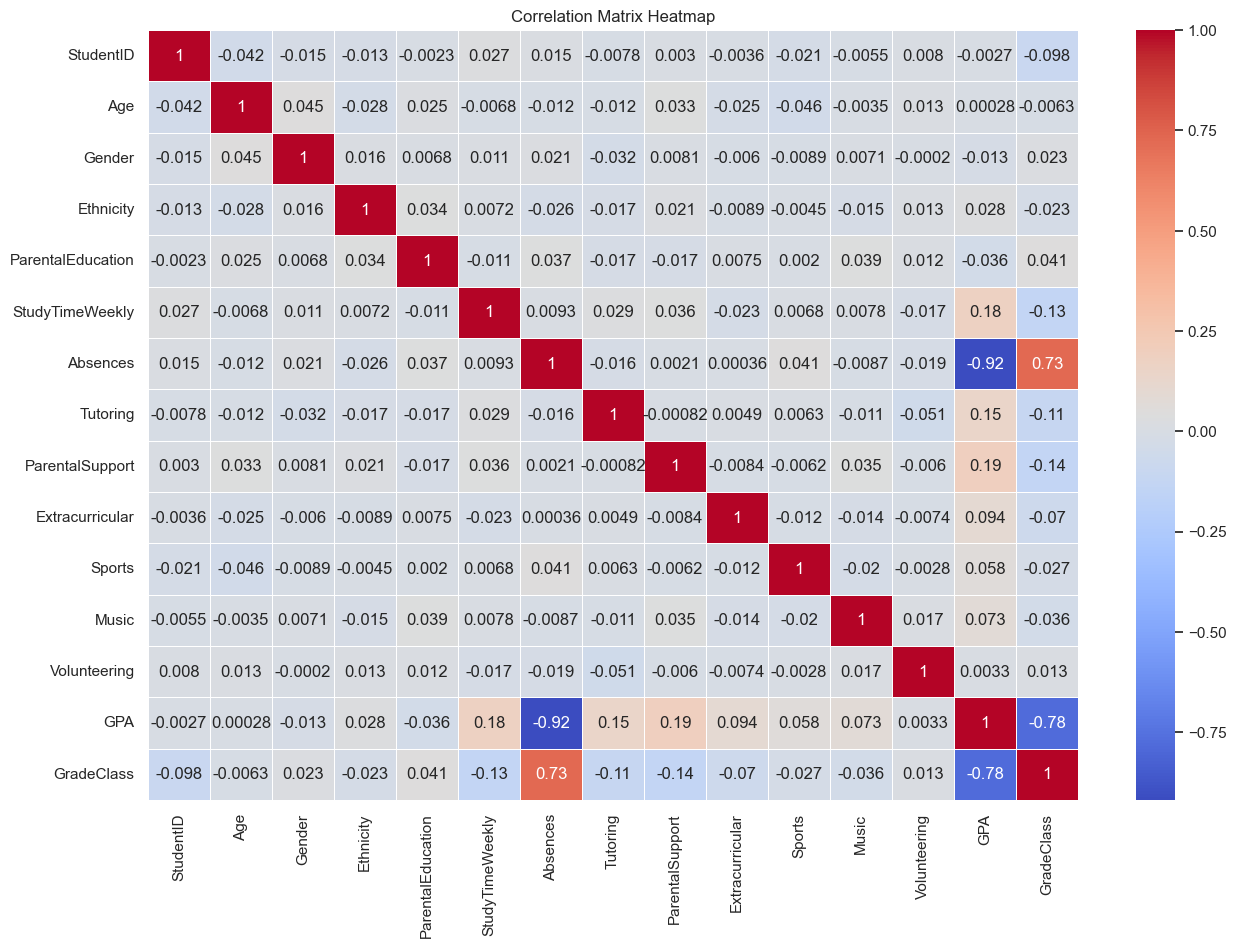

In [14]:
# Correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


----------------------------------

5. Pairplot for Numerical Features
Pairplots show relationships between pairs of numerical features, including scatter plots and histograms.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

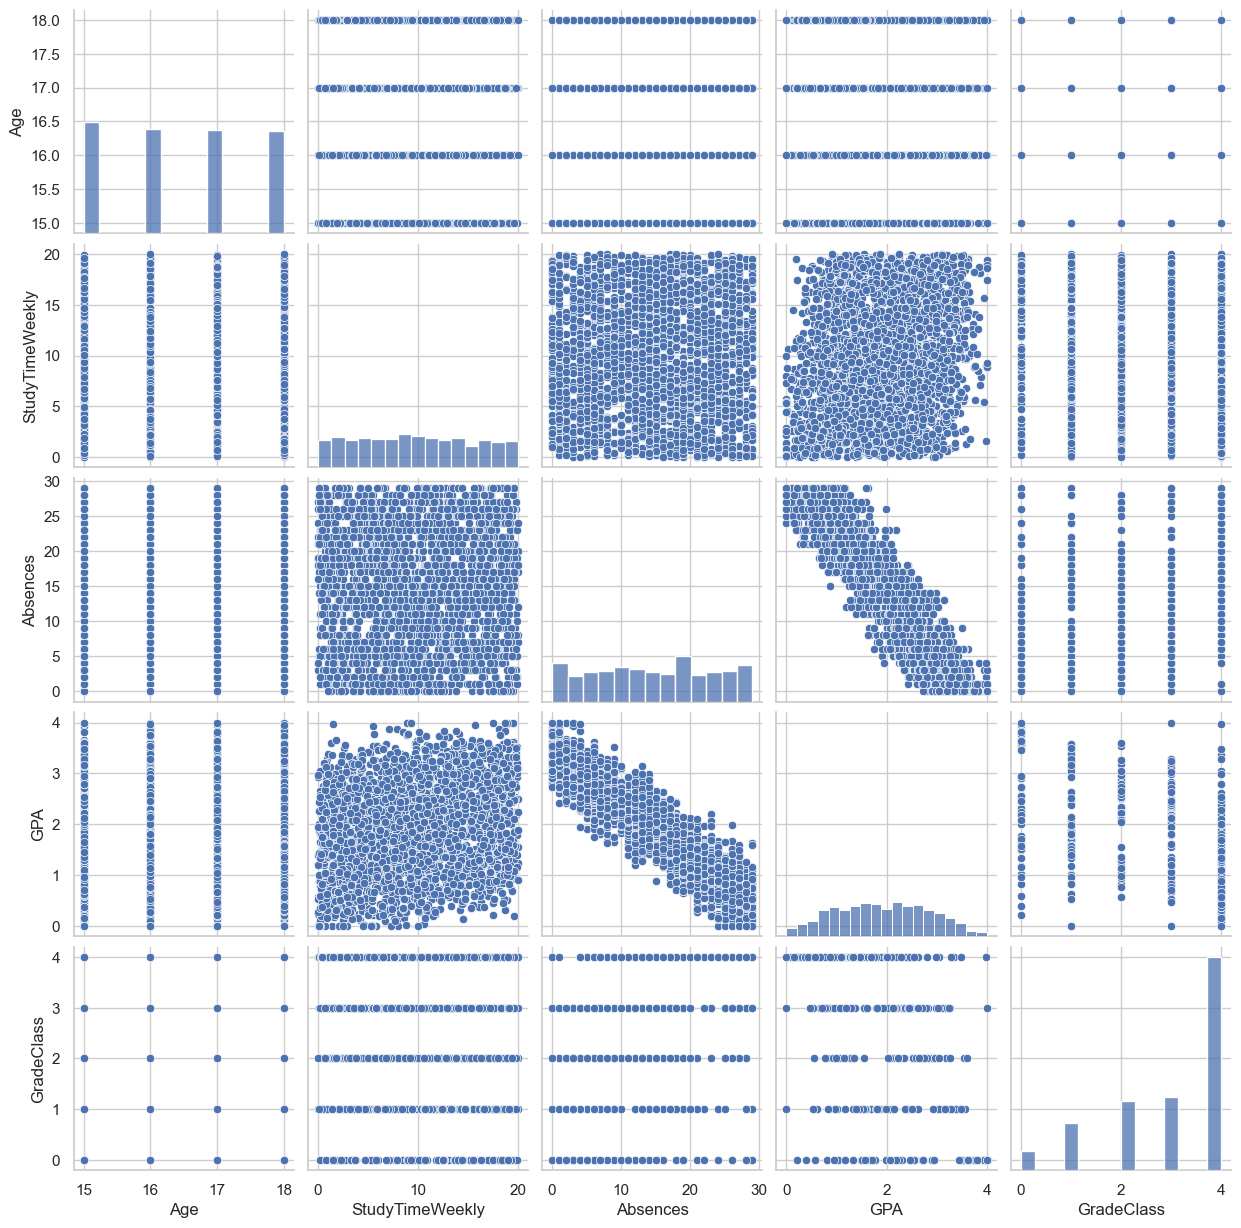

In [15]:
# Pairplot for numerical features

sns.pairplot(df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']])
plt.show()


----------------------------------

-----------------------------------

Section 4: Model Data
Classification: Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
# Train the model

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_class, y_train_class)



DecisionTreeClassifier(random_state=42)

In [18]:
# Predict

y_pred_class = dt_classifier.predict(X_test_class)



In [19]:
# Evaluate

print('Accuracy:', accuracy_score(y_test_class, y_pred_class))
print('Classification Report:\n', classification_report(y_test_class, y_pred_class))
print('Confusion Matrix:\n', confusion_matrix(y_test_class, y_pred_class))



Accuracy: 0.6179540709812108
Classification Report:
               precision    recall  f1-score   support

         0.0       0.25      0.18      0.21        22
         1.0       0.37      0.51      0.43        49
         2.0       0.43      0.42      0.43        85
         3.0       0.46      0.41      0.43        86
         4.0       0.83      0.83      0.83       237

    accuracy                           0.62       479
   macro avg       0.47      0.47      0.47       479
weighted avg       0.62      0.62      0.62       479

Confusion Matrix:
 [[  4  10   5   1   2]
 [  2  25  14   3   5]
 [  3  21  36  16   9]
 [  1   6  19  35  25]
 [  6   5   9  21 196]]


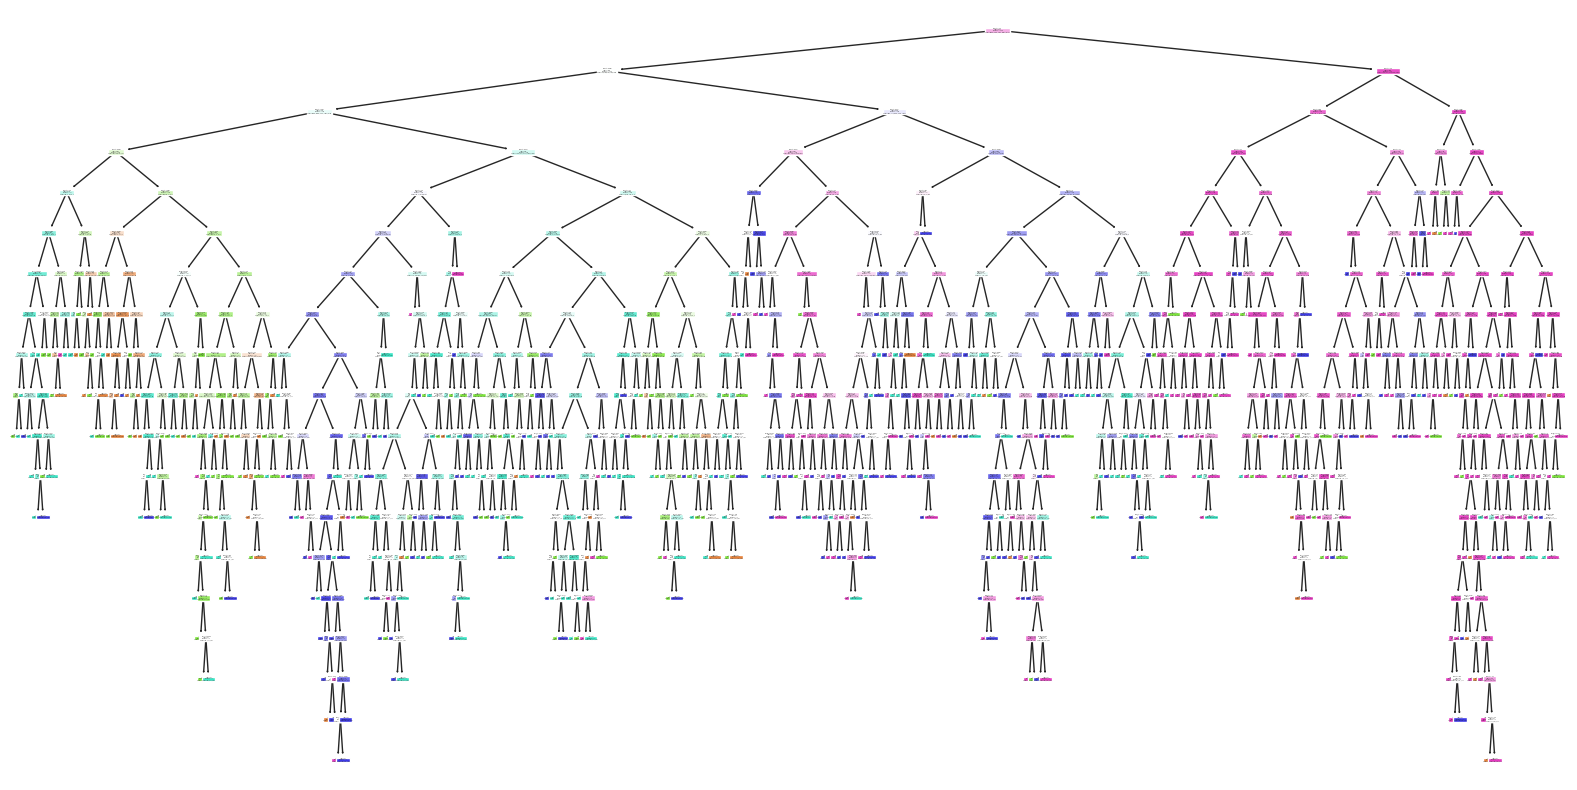

In [20]:
# Visualize the tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True)
plt.show()


-------------------------------

## Regression: Linear Regression



In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model

lr = LinearRegression()
lr.fit(X_train_gpa, y_train_gpa)



LinearRegression()

In [22]:
# Predict

y_pred_gpa = lr.predict(X_test_gpa)



In [23]:
# Evaluate

print('Mean Squared Error:', mean_squared_error(y_test_gpa, y_pred_gpa))
print('Root Mean Squared Error:', mean_squared_error(y_test_gpa, y_pred_gpa, squared=False))
print('R² Score:', r2_score(y_test_gpa, y_pred_gpa))



Mean Squared Error: 0.03866144149454256
Root Mean Squared Error: 0.19662512935670903
R² Score: 0.9532471681022928


C:\Users\karim\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


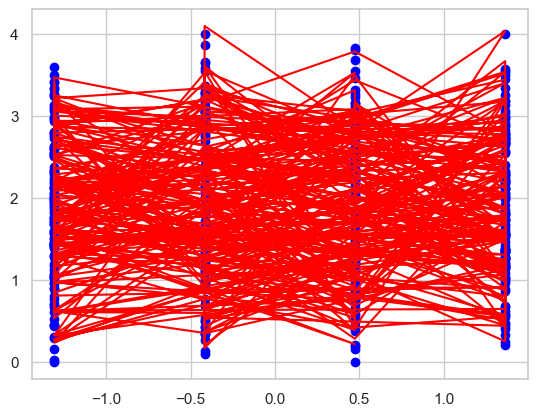

In [24]:
# Visualize the regression line

plt.scatter(X_test_gpa[:, 0], y_test_gpa, color='blue')  # Assuming 1st feature is most important
plt.plot(X_test_gpa[:, 0], y_pred_gpa, color='red')
plt.show()


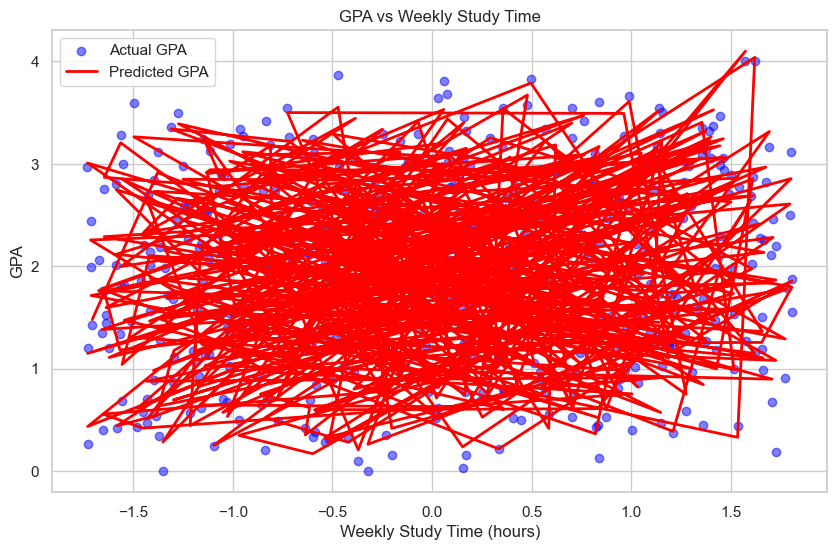

In [25]:


# Assuming 'StudyTimeWeekly' is the most relevant feature for plotting the regression line
feature_index = df.columns.get_loc('StudyTimeWeekly') - 1  # Adjusting for dropped columns in X_scaled

# Create scatter plot of the actual data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_gpa[:, feature_index], y_test_gpa, color='blue', alpha=0.5, label='Actual GPA')

# Plot the regression line
plt.plot(X_test_gpa[:, feature_index], y_pred_gpa, color='red', linewidth=2, label='Predicted GPA')

# Add labels and title
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('GPA')
plt.title('GPA vs Weekly Study Time')
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


-----------------------------

Section 5: Interpret Results


# Interpret Results
## Classification Results
- Decision Tree: (summary of results)
- Random Forest: (summary of results)
- SVM: (summary of results)

## Regression Results
- Linear Regression: (summary of results)
- Polynomial Regression: (summary of results)
- Random Forest Regressor: (summary of results)


---------------------------------------

Section 6: Deployment


In [26]:
import joblib

# Save the model

# Assuming these are your trained models and scaler
lr_model = ...  # Your linear regression model
dt_model = ...  # Your decision tree model
scaler = ...    # Your scaler

# Save the models and scaler
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [27]:
# Load the model

loaded_model = joblib.load('decision_tree_model.pkl')

---------------------------------------

Create the Flask app:
Create a file named app.py with the following content. This file should be in the same directory as the saved models.

In [28]:
from flask import Flask, request, jsonify, render_template

app = Flask(__name__)

# Load the models
lr_model = joblib.load('linear_regression_model.pkl')
dt_model = joblib.load('decision_tree_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict_gpa', methods=['POST'])
def predict_gpa():
    # Get data from form
    data = request.form.to_dict()
    data = {key: float(value) for key, value in data.items()}
    
    # Prepare data for prediction
    features = np.array([[df['Age'], df['Gender'], df['Ethnicity'], df['ParentalEducation'],
                          df['StudyTimeWeekly'], df['Absences'], df['Tutoring'], df['ParentalSupport'],
                          df['Extracurricular'], df['Sports'], df['Music'], df['Volunteering']]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Predict GPA
    gpa_prediction = lr_model.predict(features_scaled)[0]
    
    return jsonify({'predicted_gpa': gpa_prediction})

@app.route('/predict_gradeclass', methods=['POST'])
def predict_gradeclass():
    # Get data from form
    data = request.form.to_dict()
    data = {key: float(value) for key, value in data.items()}
    
    # Prepare data for prediction
    features = np.array([[df['Age'], data['Gender'], df['Ethnicity'], df['ParentalEducation'],
                          df['StudyTimeWeekly'], df['Absences'], df['Tutoring'], data['ParentalSupport'],
                          df['Extracurricular'], df['Sports'], df['Music'], df['Volunteering']]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Predict GradeClass
    gradeclass_prediction = dt_model.predict(features_scaled)[0]
    
    return jsonify({'predicted_gradeclass': gradeclass_prediction})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


-------------------------

# Section 7: Conclusion


### Summary
This project aimed to predict student GPA and Grade Class using machine learning algorithms, leveraging a dataset with various student attributes. We utilized three algorithmic methods: Linear Regression for GPA prediction, Decision Tree Classification for Grade Class prediction, and another classification or regression method (e.g., Random Forest) to provide a comprehensive analysis. The project followed these steps:

1- Project Understanding: Clearly defined the goals and scope of the project.

2- Data Mining and Processing: Cleaned and prepared the dataset, ensuring it was suitable for model training.

3- Data Exploration: Conducted exploratory data analysis to understand the distribution and relationships within the data.

4- Model Data: Trained and validated multiple models to predict GPA and Grade Class.

5- Interpret Results: Evaluated model performance using appropriate metrics and visualizations.

6- Deployment: Built a Flask web application to provide an interface for users to input student data and receive predictions

### Strengths

- Comprehensive Data Analysis: Thorough data exploration and preprocessing ensured high-quality input for the models.
- Multiple Algorithms: Using multiple algorithms provided a robust comparison and selection of the best-performing models.
- Scalable Deployment: The Flask web application allows for easy deployment and user interaction with the models.
- Interpretability: Linear Regression provides interpretable results, which are useful for understanding the influence of different features on GPA.

### Weaknesses

- Model Complexity: Decision Trees and other complex models can overfit the training data, especially with small datasets.
- Feature Engineering: Limited feature engineering might result in suboptimal model performance. More domain-specific features could improve predictions.
- Data Limitations: The dataset may not capture all the factors influencing GPA and Grade Class, leading to less accurate predictions.
- Bias and Variance: Ensuring a balance between bias and variance is challenging, particularly with models like Decision Trees which tend to have high variance.

### Future Work
#### Improvements

- Advanced Feature Engineering: Incorporate more features, such as socio-economic status, school resources, or psychological factors, to improve model accuracy.
- Hyperparameter Tuning: Perform extensive hyperparameter tuning using techniques like Grid Search or Random Search to enhance model performance.
- Ensemble Methods: Explore ensemble methods such as Random Forests, Gradient Boosting, or stacking to combine the strengths of multiple models.
- Cross-Validation: Use cross-validation techniques to ensure the models generalize well to unseen data.

### Future Extensions

- Real-time Data Integration: Integrate real-time data collection and updating to keep the model trained on the most recent data.
- User Feedback Loop: Implement a feedback mechanism in the web application to allow users to provide feedback on predictions, improving model retraining.
- Explainable AI: Develop methods to explain model predictions better, especially for complex models, to make the system more transparent and trustworthy.
- Scaling Up: Deploy the application on cloud platforms like AWS, GCP, or Azure to handle larger volumes of data and users efficiently.
- Longitudinal Studies: Conduct longitudinal studies to track the same students over time, enhancing the dataset and providing more accurate predictions.